<a href="https://colab.research.google.com/github/tejasravirao/Machine-Learning/blob/master/House%20Prices%20-%20Advanced%20Regression%20Techniques/ML_Project_Final_KYK170030_TXR171830.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [0]:
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.preprocessing import LabelEncoder
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from subprocess import check_output
import io

In [0]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_ID = train['Id']
train.drop("Id", axis = 1, inplace = True)

Before Handling outliers
(1460, 80)


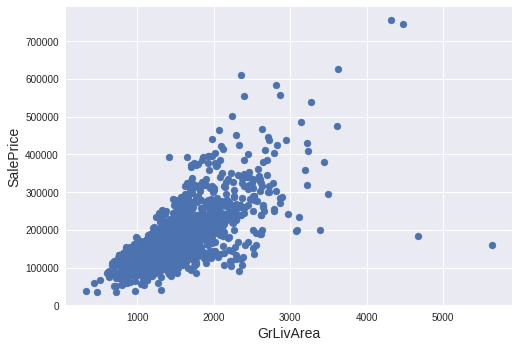

In [0]:
print("Before Handling outliers")
print(train.shape)
fig_plot, ax_plot = plt.subplots()
ax_plot.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=14)
plt.xlabel('GrLivArea', fontsize=14)
plt.show()

In [0]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

print(train.shape)

(1458, 80)


After Handling ouliers


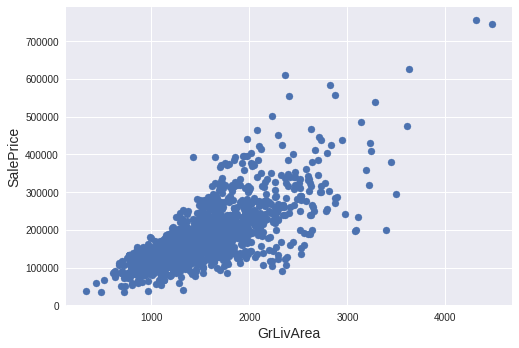

In [0]:
fig_plot, ax_plot = plt.subplots()
ax_plot.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=14)
plt.xlabel('GrLivArea', fontsize=14)
print("After Handling ouliers")
plt.show()


 mu = 180932.92 and sigma = 79467.79



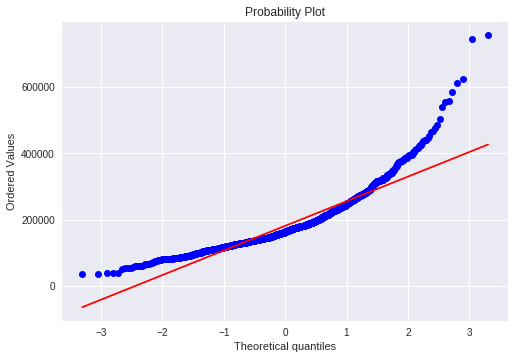

In [0]:
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig_plot = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



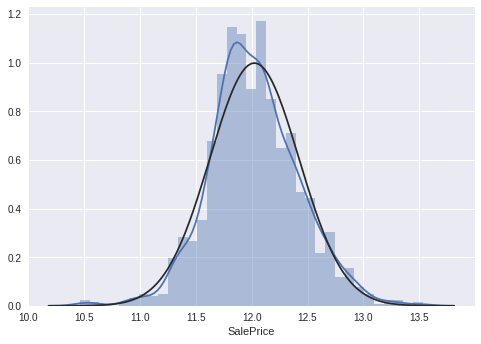

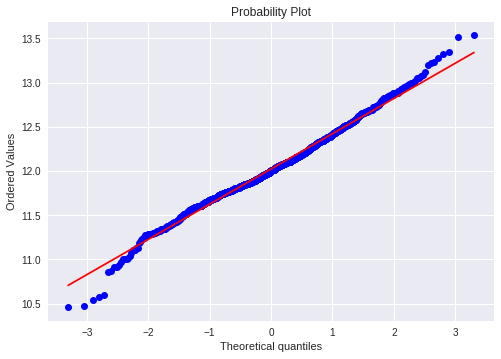

In [0]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

fig_plot = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [0]:
y_train = train.SalePrice.values

input_train_data = train

input_train_data.drop(['SalePrice'], axis=1, inplace=True)

print("input_train_data size is : {}".format(input_train_data.shape))

input_train_data_na = (input_train_data.isnull().sum() / len(input_train_data)) * 100
input_train_data_na = input_train_data_na.drop(input_train_data_na[input_train_data_na == 0].index).sort_values(ascending=False)[:30]
data_absent = pd.DataFrame({'Missing Ratio' :input_train_data_na})

print(data_absent.head(20))

input_train_data size is : (1458, 79)
              Missing Ratio
PoolQC               99.588
MiscFeature          96.296
Alley                93.759
Fence                80.727
FireplaceQu          47.325
LotFrontage          17.764
GarageYrBlt           5.556
GarageType            5.556
GarageFinish          5.556
GarageQual            5.556
GarageCond            5.556
BsmtFinType2          2.606
BsmtExposure          2.606
BsmtFinType1          2.538
BsmtCond              2.538
BsmtQual              2.538
MasVnrArea            0.549
MasVnrType            0.549
Electrical            0.069


In [0]:
input_train_data["FireplaceQu"] = input_train_data["FireplaceQu"].fillna("None")
input_train_data["Alley"] = input_train_data["Alley"].fillna("None")
input_train_data["PoolQC"] = input_train_data["PoolQC"].fillna("None")
input_train_data["Fence"] = input_train_data["Fence"].fillna("None")
input_train_data["MiscFeature"] = input_train_data["MiscFeature"].fillna("None")


In [0]:
input_train_data["LotFrontage"] = input_train_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:
for col in ('GarageCond','GarageType','GarageQual','GarageFinish'):
    input_train_data[col] = input_train_data[col].fillna('None')
for col in ('GarageCars','GarageYrBlt', 'GarageArea'):
    input_train_data[col] = input_train_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    input_train_data[col] = input_train_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    input_train_data[col] = input_train_data[col].fillna('None')

In [0]:
input_train_data['MSZoning'] = input_train_data['MSZoning'].fillna(input_train_data['MSZoning'].mode()[0])
input_train_data["MasVnrType"] = input_train_data["MasVnrType"].fillna("None")
input_train_data["MasVnrArea"] = input_train_data["MasVnrArea"].fillna(0)
input_train_data = input_train_data.drop(['Utilities'], axis=1)


In [0]:
input_train_data['Exterior2nd'] = input_train_data['Exterior2nd'].fillna(input_train_data['Exterior2nd'].mode()[0])
input_train_data['SaleType'] = input_train_data['SaleType'].fillna(input_train_data['SaleType'].mode()[0])
input_train_data['MSSubClass'] = input_train_data['MSSubClass'].fillna("None")
input_train_data["Functional"] = input_train_data["Functional"].fillna("Typ")
input_train_data['Electrical'] = input_train_data['Electrical'].fillna(input_train_data['Electrical'].mode()[0])
input_train_data['KitchenQual'] = input_train_data['KitchenQual'].fillna(input_train_data['KitchenQual'].mode()[0])
input_train_data['Exterior1st'] = input_train_data['Exterior1st'].fillna(input_train_data['Exterior1st'].mode()[0])

In [0]:
input_train_data['MSSubClass'] = input_train_data['MSSubClass'].apply(str)

input_train_data['OverallCond'] = input_train_data['OverallCond'].astype(str)
input_train_data['YrSold'] = input_train_data['YrSold'].astype(str)
input_train_data['MoSold'] = input_train_data['MoSold'].astype(str)

In [0]:
cols = ('ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
		'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'YrSold', 'MoSold','BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating'
        , 'HouseStyle', 'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 
        'SaleType')

In [0]:
for lbd in cols:
    label_ds = LabelEncoder()
    label_ds.fit(list(input_train_data[lbd].values))
    input_train_data[lbd] = label_ds.transform(list(input_train_data[lbd].values))


In [0]:
print(input_train_data.shape)

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(input_train_data,y_train,test_size = 0.20, random_state = 0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model)
score_train = model.score(X_train, y_train)
score_test  = model.score(X_test, y_test)

parameters = {}
model = GridSearchCV(LinearRegression(), parameters, cv=5)
model.fit(X_train,y_train)

output=model.predict(X_test)
score_r2_pred = r2_score(y_test, output)

rmse = np.sqrt(mean_squared_error(y_test,output))
Obsv_tbl=[['Linear Regressor',score_train,score_test,score_r2_pred,rmse]]

import xgboost as xgb
from sklearn.metrics import mean_squared_error as ms
from math import sqrt

model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             n_estimators=2500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             
                             random_state =7)
model.fit(X_train,y_train)
print(model)
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)

output = model.predict(X_test)
score_r2_pred = r2_score(y_test, output)

final_df=pd.DataFrame()
mse=ms(y_test,output)
rmse=sqrt(mse)

Obsv_tbl +=[['XGB Regressor',score_train,score_test,score_r2_pred,rmse]]

from sklearn.ensemble import AdaBoostRegressor

parameters = {}
model = GridSearchCV(AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estimators=500, random_state=None),parameters,cv=5)

model.fit(X_train,y_train)
print(model)
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)

output = model.predict(X_test)
score_r2_pred = r2_score(y_test, output)

final_df=pd.DataFrame()
mse=ms(y_test,output)
rmse=sqrt(mse)

Obsv_tbl +=[['AdaBoost Regressor',score_train,score_test,score_r2_pred,rmse]]

from sklearn.ensemble import GradientBoostingRegressor

parameters = {}
model = GridSearchCV(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',random_state =5),parameters,cv=5)

model.fit(X_train,y_train)
print(model)
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)

output = model.predict(X_test)
score_r2_pred = r2_score(y_test, output)

final_df=pd.DataFrame()
mse=ms(y_test,output)
rmse=sqrt(mse)

Obsv_tbl +=[['Gradient Boosting Regressor',score_train,score_test,score_r2_pred,rmse]]

from sklearn.ensemble import RandomForestRegressor

parameters = {}
model = GridSearchCV(RandomForestRegressor(n_estimators=500), parameters, cv=5)

model.fit(X_train,y_train)
print(model)

score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)

output = model.predict(X_test)
score_r2_pred = r2_score(y_test, output)

final_df=pd.DataFrame()
mse=ms(y_test,output)
rmse=sqrt(mse)

Obsv_tbl +=[['Random Forest Regressor',score_train,score_test,score_r2_pred,rmse]]

from sklearn.ensemble import BaggingRegressor

parameters = {}
model = GridSearchCV(BaggingRegressor(n_estimators=500), parameters, cv=5)

model.fit(X_train,y_train)
print(model)

score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)

output = model.predict(X_test)
score_r2_pred = r2_score(y_test, output)

final_df=pd.DataFrame()
mse=ms(y_test,output)
rmse=sqrt(mse)

Obsv_tbl +=[['Bagging Regressor',score_train,score_test,score_r2_pred,rmse]]

import pandas as pd
pd.DataFrame(Obsv_tbl,columns=['Model','R^2 Score for train','R^2 Score for test','R^2 Score between true & pred','Root Mean Squared Error'])


(1458, 78)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=2500, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
       scale_pos_weight=1, seed=None, silent=True, subsample=1)
GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estimators=500, random_state=None),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss=

,Model,R^2 Score for train,R^2 Score for test,R^2 Score between true & pred,Root Mean Squared Error
0,Linear Regressor,0.919,0.922,0.922,0.115
1,XGB Regressor,0.949,0.926,0.926,0.112
2,AdaBoost Regressor,0.859,0.853,0.853,0.158
3,Gradient Boosting Regressor,1.000,0.936,0.936,0.105
4,Random Forest Regressor,0.982,0.912,0.912,0.122
5,Bagging Regressor,0.983,0.915,0.915,0.120
